# Image Classification using Convolutional Neural Network
- This tutorial covers developing a basic DNN and then a basic CNN model to classify image data.
- Dataset used for analysis is FMNIST image dataset available in Tensflow's dataset repository.
- Multiclass classification DNN and CNN in `Tensorflow` framework are developed to identify 10 different classes of fashion items.
- It can be observed that CNN model outperforms DNN in image classification

In [1]:
# importing libraries necessary for data transformation, model development etc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


### I. Data Import and Pre-processing

In [3]:
# Load the Fashion MNIST dataset
df_mnist = tf.keras.datasets.fashion_mnist

In [4]:
# split Fashion MNIST dataset into test and training dataset : X and Y/Target variables also defined
(X_train, Y_train), (X_test, Y_test) = df_mnist.load_data()

In [5]:
# checking the dimensions of the datasets generated
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

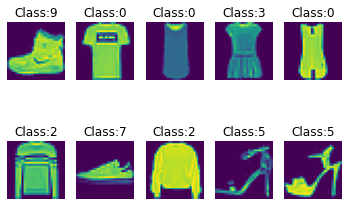

In [6]:
# Print first 10 elements/images with their corresponding label in the training dataset

for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title('Class:{}'.format(Y_train[i]))
    plt.axis('off')
    plt.grid(True)

In [7]:
# normalizing images in train and test dataset
X_train  = X_train / 255.0
X_test = X_test / 255.0

### II. Base DNN model development
- Building a baseline Dense Neural Network with 3 layers :
  - 64 units in Layer1
  - 64 units in Layer2
  - 10 units in Layer3 (Last layer has 10 units to classify 10 classes)

In [8]:
# clear state
tf.keras.backend.clear_session()
np.random.seed(21)

In [9]:
# develop base dnn
dnn_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(X_train.shape[1],
                                                                             X_train.shape[2])),
                                         tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                         tf.keras.layers.Dense(16, activation='relu'), 
                                         tf.keras.layers.Dense(10, activation='softmax')])

# Assign model hyperparameters
dnn_model.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics=['accuracy'])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit dnn model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
dnn_model_history = dnn_model.fit(X_train, Y_train, validation_split=0.10,
                                  epochs=10, callbacks=[callback], batch_size=256)

Epoch 1/10
211/211 [==============================] - 3s 10ms/step - loss: 0.9469 - accuracy: 0.7155 - val_loss: 0.5487 - val_accuracy: 0.8193
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.4984 - accuracy: 0.8321 - val_loss: 0.4549 - val_accuracy: 0.8427
Epoch 3/10
211/211 [==============================] - 2s 7ms/step - loss: 0.4413 - accuracy: 0.8490 - val_loss: 0.4300 - val_accuracy: 0.8487
Epoch 4/10
211/211 [==============================] - 1s 6ms/step - loss: 0.4097 - accuracy: 0.8591 - val_loss: 0.4094 - val_accuracy: 0.8548
Epoch 5/10
211/211 [==============================] - 1s 7ms/step - loss: 0.3890 - accuracy: 0.8660 - val_loss: 0.3915 - val_accuracy: 0.8607
Epoch 6/10
211/211 [==============================] - 2s 8ms/step - loss: 0.3720 - accuracy: 0.8710 - val_loss: 0.3849 - val_accuracy: 0.8610
Epoch 7/10
211/211 [==============================] - 2s 7ms/step - loss: 0.3614 - accuracy: 0.8736 - val_loss: 0.3730 - val_accuracy: 0.8658
Epoch

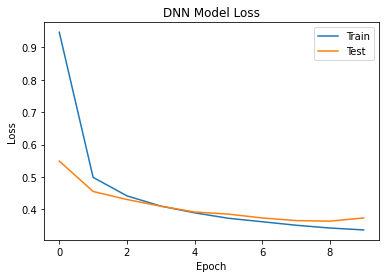

In [11]:
# summarize history for loss
plt.plot(dnn_model_history.history['loss'])
plt.plot(dnn_model_history.history['val_loss'])
plt.title('DNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

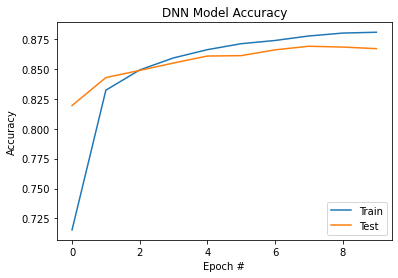

In [12]:
# summarize history for accuracy
plt.plot(dnn_model_history.history['accuracy'])
plt.plot(dnn_model_history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [13]:
# Evaluate the model on Test data
result_dictionary = dnn_model.evaluate(X_test, Y_test, return_dict=True, verbose=0)
dnn_model_performance = pd.DataFrame([result_dictionary.values()],
                                     columns=[list(result_dictionary.keys())])
dnn_model_performance['loss'] = round((dnn_model_performance['loss']),4)
dnn_model_performance['accuracy'] = round((dnn_model_performance['accuracy'])*100,2)
dnn_model_performance.index = ['DNN_Model']   
print('DNN Model performance on Test data')
print(dnn_model_performance)

DNN Model performance on Test data
             loss accuracy
DNN_Model  0.4017    85.67


### III. Base CNN model development
- Building a baseline Convolutional Neural Network with 5 layers :
  - 3x3 filter with stride of 1 and 2x2 Average pooling with stride of 2 in Layer1
  - 3x3 filter with stride of 1 and 2x2 Max pooling with stride of 2 in Layer2
  - 128 units in Layer3
  - 32 units in Layer4
  - 10 units in Layer5 (Last layer has 10 units to classify 10 classes)

In [14]:
# clear state
tf.keras.backend.clear_session()
np.random.seed(21)

In [15]:
# checking shape of image data
X_test.shape

(10000, 28, 28)

In [16]:
# re-shaping image data : adding 1 more dimension to allow data to pass in a Conv2D layer
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# build base CNN model
cnn_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                                                               strides=(1, 1),
                                                               input_shape=(X_train.shape[1],
                                                                            X_train.shape[2],
                                                                            X_train.shape[3])),
                                        tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                                                         strides=(2, 2)),
                                        tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                                                               strides=(1, 1)),
                                        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                                                     strides=(2, 2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(10)]) # activation='softmax'

cnn_model.compile(optimizer = tf.optimizers.Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [17]:
# fit CNN model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
cnn_model_history = cnn_model.fit(X_train, Y_train, epochs=10, callbacks=[callback],
                                  batch_size=256, validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 27s 126ms/step - loss: 0.7239 - accuracy: 0.7398 - val_loss: 0.4931 - val_accuracy: 0.8172
Epoch 2/10
211/211 [==============================] - 26s 125ms/step - loss: 0.4402 - accuracy: 0.8405 - val_loss: 0.4070 - val_accuracy: 0.8503
Epoch 3/10
211/211 [==============================] - 27s 126ms/step - loss: 0.3901 - accuracy: 0.8589 - val_loss: 0.3696 - val_accuracy: 0.8662
Epoch 4/10
211/211 [==============================] - 28s 134ms/step - loss: 0.3519 - accuracy: 0.8716 - val_loss: 0.3418 - val_accuracy: 0.8738
Epoch 5/10
211/211 [==============================] - 27s 127ms/step - loss: 0.3299 - accuracy: 0.8797 - val_loss: 0.3398 - val_accuracy: 0.8755
Epoch 6/10
211/211 [==============================] - 26s 125ms/step - loss: 0.3140 - accuracy: 0.8851 - val_loss: 0.3101 - val_accuracy: 0.8863
Epoch 7/10
211/211 [==============================] - 27s 128ms/step - loss: 0.2965 - accuracy: 0.8914 - val_loss: 0.3158 - val_ac

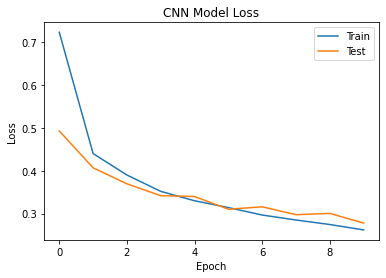

In [19]:
# summarize history for loss
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

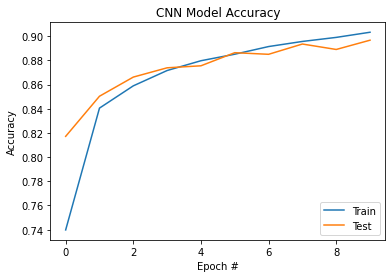

In [20]:
# summarize history for accuracy
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [21]:
# Evaluate the model on Test data
result_dictionary = cnn_model.evaluate(X_test, Y_test, return_dict=True, verbose=0)
cnn_model_performance = pd.DataFrame([result_dictionary.values()],
                                      columns=[list(result_dictionary.keys())])
cnn_model_performance['loss'] = round((cnn_model_performance['loss']),4)
cnn_model_performance['accuracy'] = round((cnn_model_performance['accuracy'])*100,2)
cnn_model_performance.index = ['CNN_Model']   
print('CNN Model performance on Test data')
print(cnn_model_performance)

CNN Model performance on Test data
             loss accuracy
CNN_Model  0.2997    89.24
